In [1]:
#-- import modules --

import numpy as np
import h5py 
import os
import sys
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
with h5py.File('quantities_of_interest_main_all_O5.hdf') as f_all_O5:
    
    print(list(f_all_O5.keys()))
    print('\n',f_all_O5['H1K1A0'].keys())
    
    parameters = list(f_all_O5['H1K1A0'].keys())
    list_O5_combs = list(f_all_O5.keys())

['H1K1A0', 'H1V1A0', 'H1V1K1', 'H1V1K1A0', 'L1H1A0', 'L1H1K1', 'L1H1K1A0', 'L1H1V1', 'L1H1V1A0', 'L1H1V1K1', 'L1H1V1K1A0', 'L1K1A0', 'L1V1A0', 'L1V1K1', 'L1V1K1A0', 'V1K1A0']

 <KeysViewHDF5 ['delta_Mc', 'delta_chi_eff', 'delta_dL', 'delta_iota', 'delta_mass_ratio', 'delta_omega', 'delta_pol', 'delta_tc', 'delta_z']>


In [3]:
parameters

['delta_Mc',
 'delta_chi_eff',
 'delta_dL',
 'delta_iota',
 'delta_mass_ratio',
 'delta_omega',
 'delta_pol',
 'delta_tc',
 'delta_z']

<br>

In [4]:
index = np.loadtxt(os.getcwd() + '/../O5_A0/index_V1K1A0_detected.txt')

In [5]:
len(index.astype(int))

281

### $\Rightarrow$ We shall first create a file with quantities corresponding to the "detected events" in O5

In [6]:
for comb in list_O5_combs:
    
    if (comb=='L1H1V1K1A0'):
        
        pass
    
    else:
    
        index_array = np.loadtxt(os.getcwd() + '/../O5_A0/index_{}_detected.txt'.format(comb))

        index = index_array.astype(int)
        
        param_dict = {}
        
        with h5py.File('quantities_of_interest_main_all_O5.hdf', 'r') as f_all_O5:
        
            for param in parameters:
                
                param_all_array = np.array(f_all_O5[comb][param])

                param_dict[param] = param_all_array[index]
                
        with h5py.File('quantities_of_detected_events_O5.hdf', 'a') as f:
            
            group=f.create_group(comb) #-- network combination group --           
            
            for param in parameters:
                
                group.create_dataset(param, data=param_dict[param])
                
   

In [7]:
#-- adding the 'L1H1V1A0' group data separately --

f_old = h5py.File('quantities_of_interest_main_all_O5.hdf', 'r')

f_O5 = h5py.File('quantities_of_detected_events_O5.hdf', 'a')

f_old.copy('L1H1V1K1A0', f_O5)

### Test

In [6]:
with h5py.File('quantities_of_detected_events_O5.hdf', 'r') as f_1:
    
    print(list(f_1.keys()))
    print('\n',f_1['H1V1K1A0'].keys())
    
    a1 = np.array(f_1['H1V1K1A0']['delta_omega'])
    k1 = np.array(f_1['H1V1K1']['delta_omega'])

['H1K1A0', 'H1V1A0', 'H1V1K1', 'H1V1K1A0', 'L1H1A0', 'L1H1K1', 'L1H1K1A0', 'L1H1V1', 'L1H1V1A0', 'L1H1V1K1', 'L1H1V1K1A0', 'L1K1A0', 'L1V1A0', 'L1V1K1', 'L1V1K1A0', 'V1K1A0']

 <KeysViewHDF5 ['delta_Mc', 'delta_chi_eff', 'delta_dL', 'delta_iota', 'delta_mass_ratio', 'delta_omega', 'delta_pol', 'delta_tc', 'delta_z']>


In [7]:

k1.max(), a1.max(), np.argmax(k1)

(6877.94585268948, 39.38778849049593, 193)

In [8]:
np.sort(k1), len(k1)

(array([1.29172538e+00, 1.36713066e+00, 1.42942199e+00, 1.43270048e+00,
        1.44909293e+00, 1.45564992e+00, 1.53761219e+00, 1.54744766e+00,
        1.58023257e+00, 1.62285295e+00, 1.67858729e+00, 1.68186578e+00,
        1.72120767e+00, 1.74415711e+00, 1.77366352e+00, 1.77694201e+00,
        1.78349900e+00, 1.94086655e+00, 1.95070203e+00, 1.98020844e+00,
        1.98676543e+00, 1.99004392e+00, 2.06872770e+00, 2.07856317e+00,
        2.08184166e+00, 2.09167713e+00, 2.19331035e+00, 2.20970280e+00,
        2.24904469e+00, 2.25560167e+00, 2.28510809e+00, 2.29494356e+00,
        2.30477903e+00, 2.31133602e+00, 2.31789300e+00, 2.32117149e+00,
        2.32772847e+00, 2.33756394e+00, 2.35723489e+00, 2.43919716e+00,
        2.53099490e+00, 2.53099490e+00, 2.54738735e+00, 2.56377981e+00,
        2.57689377e+00, 2.58345075e+00, 2.66213453e+00, 2.66213453e+00,
        2.66213453e+00, 2.70475491e+00, 2.75065378e+00, 2.87195794e+00,
        2.88179341e+00, 2.91129983e+00, 2.97686965e+00, 2.983426

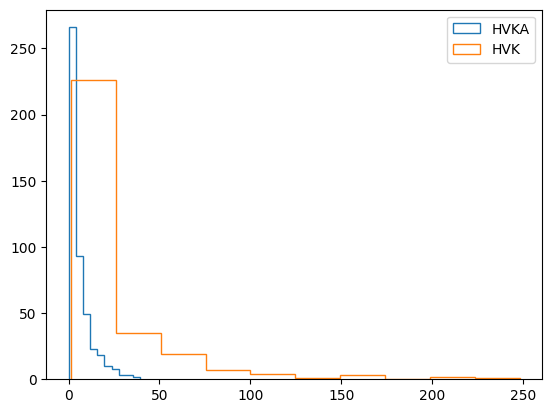

In [9]:
plt.hist(a1, histtype='step', label='HVKA', density=False);
plt.hist(np.sort(k1)[:-2], histtype='step', label='HVK', density=False);
plt.legend()